### kernels are used to transform the data into some higher dimensions

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_circles

In [4]:
X, Y = make_circles(n_samples=400, shuffle=True, noise=0.05, random_state=3)

In [5]:
print(X.shape)
print(Y.shape)

(400, 2)
(400,)


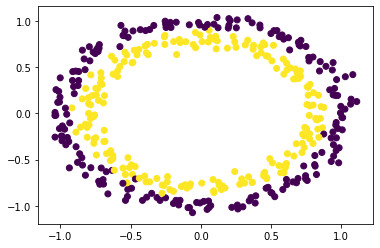

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=Y);

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression(solver='newton-cg')

In [11]:
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
lr.score(X_train, Y_train)

0.44285714285714284

In [13]:
lr.score(X_test, Y_test)

0.39166666666666666

### Let's use SVM with kernels

In [14]:
from sklearn.svm import SVC

In [15]:
svc = SVC(gamma='auto')

In [16]:
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
svc.score(X_train, Y_train)

0.9821428571428571

In [18]:
svc.score(X_test, Y_test)

0.9833333333333333

### see the  difference in the accuuracy 

### now see the diff with linear kernel which is same as Logistic Regression

In [19]:
svc1 = SVC(kernel='linear', gamma='auto')

In [20]:
svc1.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
svc1.score(X_train, Y_train)

0.5107142857142857

In [22]:
svc1.score(X_test, Y_test)

0.475

### grid search ! finding the right parameter

In [23]:
from sklearn.datasets import load_digits

In [24]:
digits = load_digits()

In [25]:
X = digits.data
Y = digits.target

In [26]:
print(X.shape, Y.shape)

(1797, 64) (1797,)


### Applying linear model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [28]:
model = LogisticRegression(solver='newton-cg', multi_class='auto')
model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
model.score(X, Y)

1.0

In [30]:
## apply svm
svc2 = SVC()
svc2.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
svc2.score(X, Y)

1.0

In [32]:
###############

In [33]:
from sklearn.datasets import load_digits 
from sklearn.model_selection import GridSearchCV
from sklearn import svm 

In [34]:
params=[
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[0.1,0.2,0.5,1.0,2.0,5.0]
    }
]
    

In [35]:
data = load_digits()
X= data.data
Y=data.target
print(X.shape,Y.shape)

(1797, 64) (1797,)


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr= LogisticRegression()
lr.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
cross_val_score(lr,X,Y,scoring="accuracy",cv=5).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

0.9210188113360701

In [40]:
from sklearn import svm

In [41]:
svc= svm.SVC()
svc.fit(X,Y)
cross_val_score(svc,X,Y,scoring="accuracy",cv=5).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

0.44878680061604637

In [42]:
import multiprocessing

In [43]:
cpus= multiprocessing.cpu_count()
cpus

12

In [44]:
gs = GridSearchCV(estimator=svm.SVC(), param_grid=params,scoring="accuracy",cv=5,n_jobs=12)

In [45]:
gs.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=12,
             param_grid=[{'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [46]:
gs.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
gs.best_score_

0.9699499165275459